<h1 style='color:purple' align='center'> Regression Project: Predicting Home Prices in Bangalore </h1>

Dataset is taken from www.Kaggle.com

#### Import all the packages

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot
matplotlib.rcParams["figure.figsize"] = (20,10)

In [41]:
import matplotlib
matplotlib.__version__

'3.5.2'

In [42]:
import warnings
warnings.filterwarnings("ignore")

<h3 style='color:blue'>Data Loading: Loading banglore home prices into a dataframe</h3>

In [43]:
df1=pd.read_csv("bengaluru_house_prices.csv") #Reading csv file
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [44]:
df1.tail()

area_type   availability               location       size  \
13315        Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13316  Super built-up  Area  Ready To Move          Richards Town      4 BHK   
13317        Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   
13318  Super built-up  Area         18-Jun        Padmanabhanagar      4 BHK   
13319  Super built-up  Area  Ready To Move           Doddathoguru      1 BHK   

       society total_sqft  bath  balcony  price  
13315  ArsiaEx       3453   4.0      0.0  231.0  
13316      NaN       3600   5.0      NaN  400.0  
13317  Mahla T       1141   2.0      1.0   60.0  
13318  SollyCl       4689   4.0      1.0  488.0  
13319      NaN        550   1.0      1.0   17.0

In [45]:
df1.shape #no of rows and columns

(13320, 9)

In [46]:
df1.columns #no of columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [47]:
df1.columns.values

array(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'], dtype=object)

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [49]:
df1['area_type'].unique() #read all information in the particular column

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [50]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [51]:
df1.groupby('area_type')['area_type'].agg('count') #

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [52]:
df1.describe()

bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

<h3 style='color:blue'>Drop features that are not required to build our model</h3>

In [53]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head() #Dataframe after dropping unwanted columns


location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [54]:
df2.shape #no of rows and columns

(13320, 5)

<h3 style='color:blue'>Data Cleaning: Handle NA values</h3>

In [55]:
df2.isnull().sum() #no of total col values is null

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [56]:
df2.shape

(13320, 5)

In [57]:
df3=df2.dropna() #dropping null values
df3.isnull().sum() #checking missing values

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [58]:
df3.duplicated().sum() 

881

In [59]:
df3.shape

(13246, 5)

Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [60]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [61]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0])) #create new column size

In [62]:
df3.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [63]:
df3['bhk'].unique() #exploring bhk data

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [64]:
df3[df3.bhk.astype(float)>22] #bhk>20

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [65]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### Explore total sqft

In [66]:
def is_float(x):
    try:
         float(x)
    except:
         return False
    return True

In [67]:
df3[~df3['total_sqft'].apply(is_float)].head(10) #nigatte to return all the ranges other than float

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

Create the function to return the average from given range of sqft

In [68]:
def convert_sqrt_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0]) + float(tokens[1]))/ 2
    try:
        return float(x)
    except:
        return None

In [69]:
convert_sqrt_to_num('2166')

2166.0

In [70]:
convert_sqrt_to_num('2100 - 2850')

2475.0

In [71]:
convert_sqrt_to_num('34.46Sq. Meter')

In [72]:
df4 = df3.copy() #Copy of df3
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqrt_to_num) #convert all ranges to average
df4 = df4[df4.total_sqft.notnull()]
df4.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

**Total sqft is 2475 which is an average of the range 2100-2850**

In [73]:
df4.loc[30] #access index 30

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [74]:
df4.head(5) #display top 5 rows

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

 <h3 style='color:blue'>Feature Engineering</h3>

**Add new feature called price per square feet**

In [75]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft'] #Finding price per sq ft
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [76]:
len(df5.location.unique()) #to find no of locations in total

1298

In [77]:
df5_stats = df5['price_per_sqft'].describe() #to describe inference statistics.
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [132]:
df5.to_csv("bhp.csv",index=False) #dataframe-pandas to csv

**Examine locations which is a categorical variable and apply dimensionality reduction technique to reduce number of locations**

In [79]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [80]:
location_stats.values.sum()

13200

In [81]:
len(location_stats[location_stats>10])

240

In [82]:
len(location_stats)

1287

In [83]:
len(location_stats[location_stats<=10]) #No of locations have less than 10 datapoint

1047

<h3 style="color:blue">Dimensionality Reduction</h3>

**location having less than 10 data points should be tagged as "other". So that number of categories can be reduced**

In [84]:
location_stats_less_than_10=location_stats[location_stats<=10] #list the locations having minimum datapoints
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [85]:
len(df5.location.unique()) #total no of unique locations

1287

In [86]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [87]:
df5.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

 <h3 style='color:blue'>Outlier detection</h3>

In [88]:
600/6

100.0

In [89]:
df5[df5.total_sqft.astype(float)/df5.bhk.astype(float)<300].head() #List the sqft of each bhk under 300sqft

location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [90]:
df5.shape #no of rows

(13200, 7)

**We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are data errors that can be removed**

In [91]:
df6=df5[~(df5.total_sqft.astype(float)/df5.bhk.astype(float)<300)] #remove the outliers.
df6.shape

(12456, 7)

In [92]:
df6.price_per_sqft.describe() #statistics of price per sqft column to remove outliers using sd

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Remove the price per sqft outliers per location**

'''we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in prices. We should remove outliers per location using mean and one standard deviation'''

In [93]:
def remove_pps_outliers(df):
   df_out=pd.DataFrame()
   for key, subdf in df.groupby('location'):
       m=np.mean(subdf.price_per_sqft)
       st=np.std(subdf.price_per_sqft)
       reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
       df_out=pd.concat([df_out,reduced_df],ignore_index=True)
   return df_out

df7=remove_pps_outliers(df6)
df7.shape

(10242, 7)

In [94]:
df7.head(5)

location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668

check for a given location how does the 2 BHK and 3 BHK property prices looks

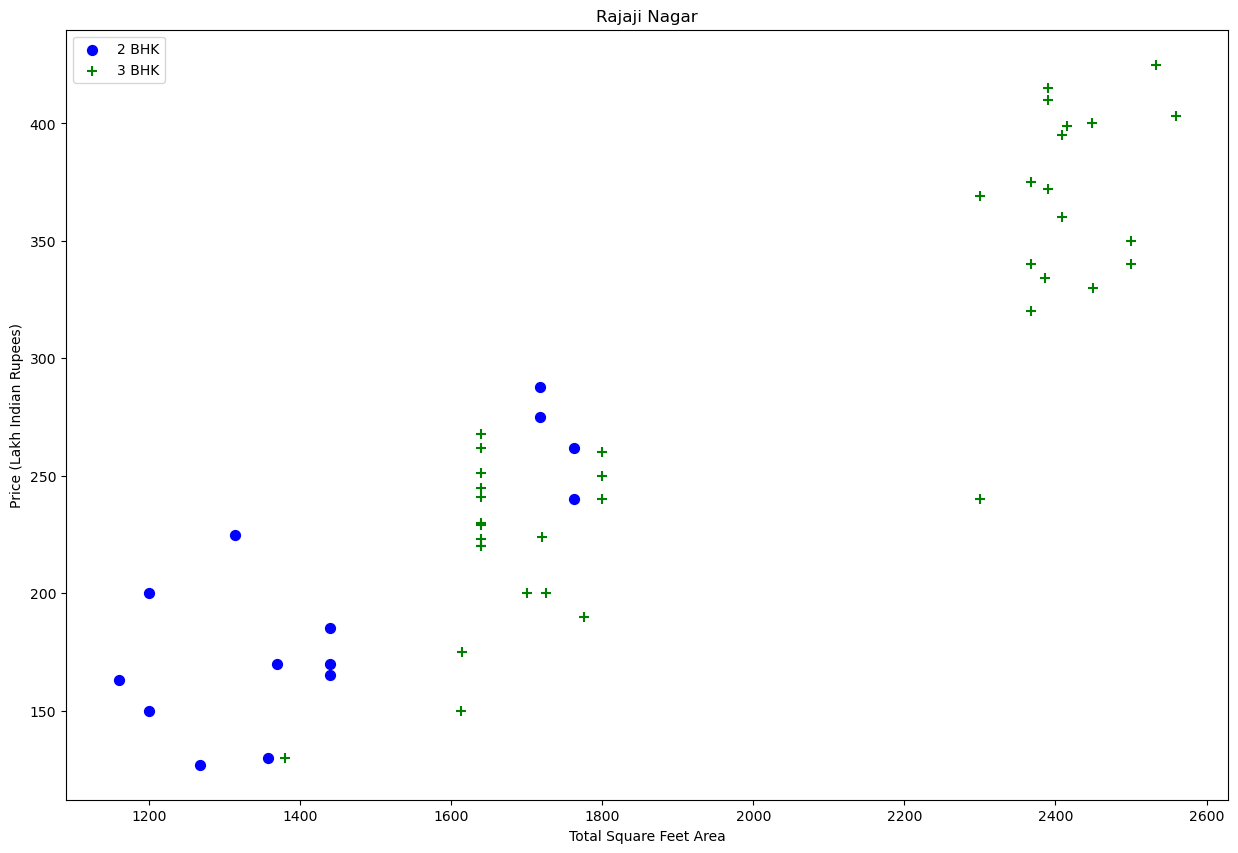

In [95]:
df7=pd.read_csv("bhp.csv")
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [96]:
df7.shape

(10242, 7)

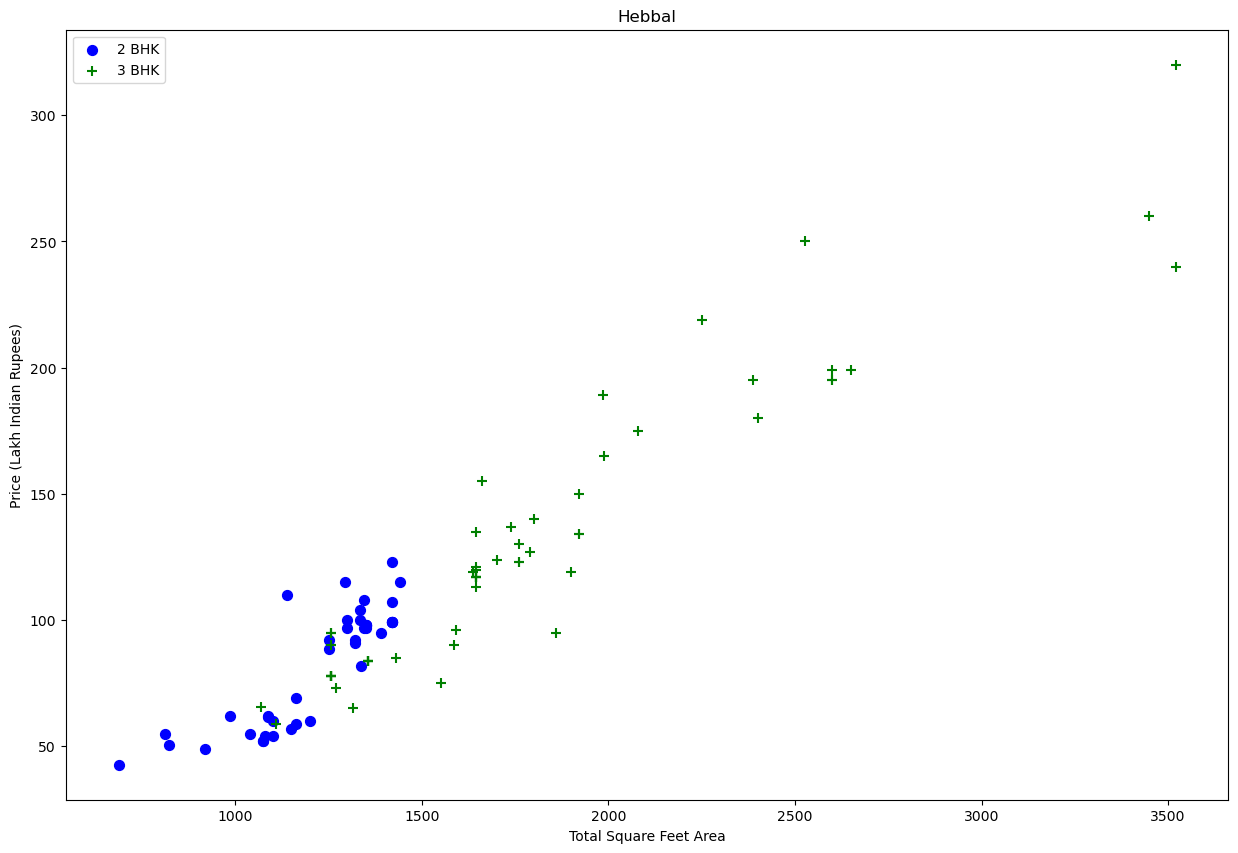

In [97]:
plot_scatter_chart(df7,"Hebbal") #Predict prices of 2BHK and 3BHK

In [98]:
df7.shape

(10242, 7)

**Remove properties where for same location, the price of 3 bedroom apartment is less than 2 bedroom apartment (with same sqft area).  For a given location,build a dictionary of stats per bhk**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK**

In [99]:
df7.head(3)

location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333

In [100]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

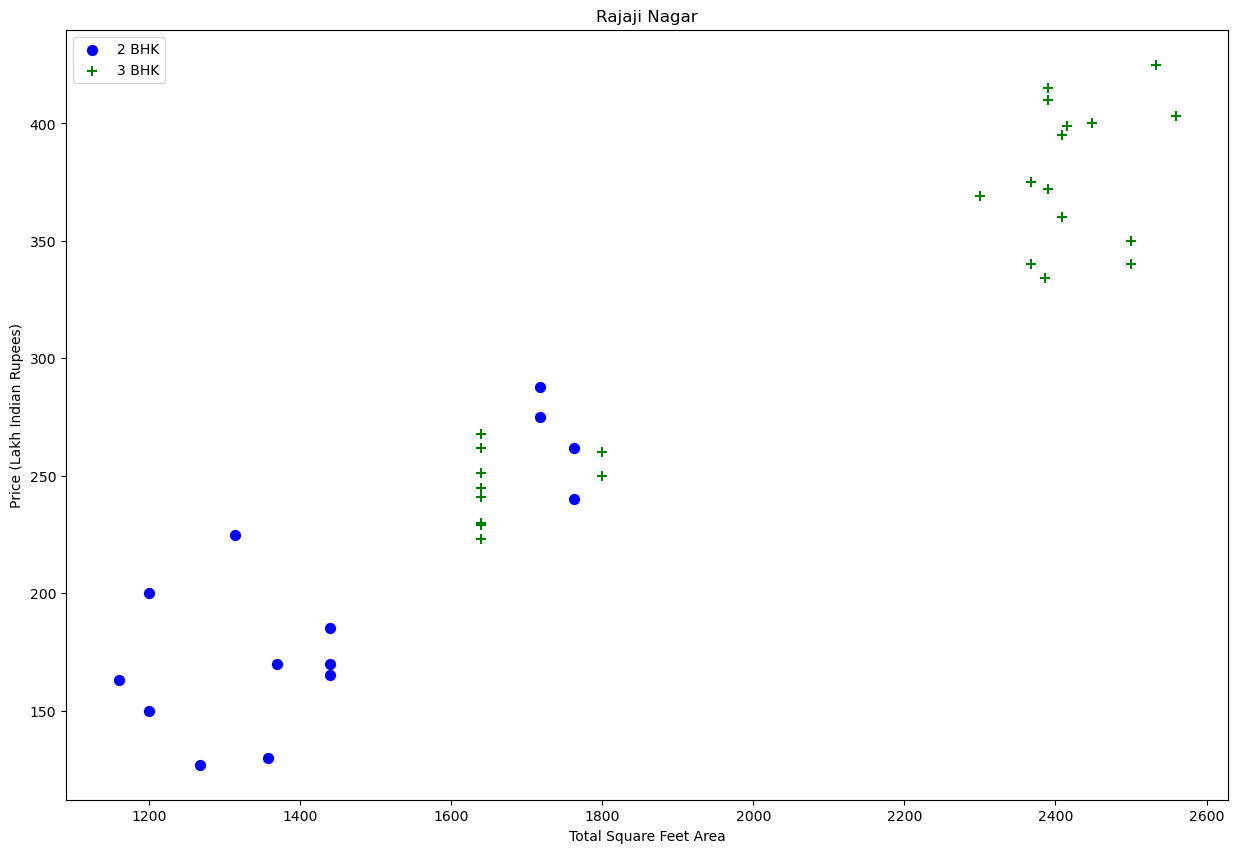

In [101]:
plot_scatter_chart(df8,"Rajaji Nagar")

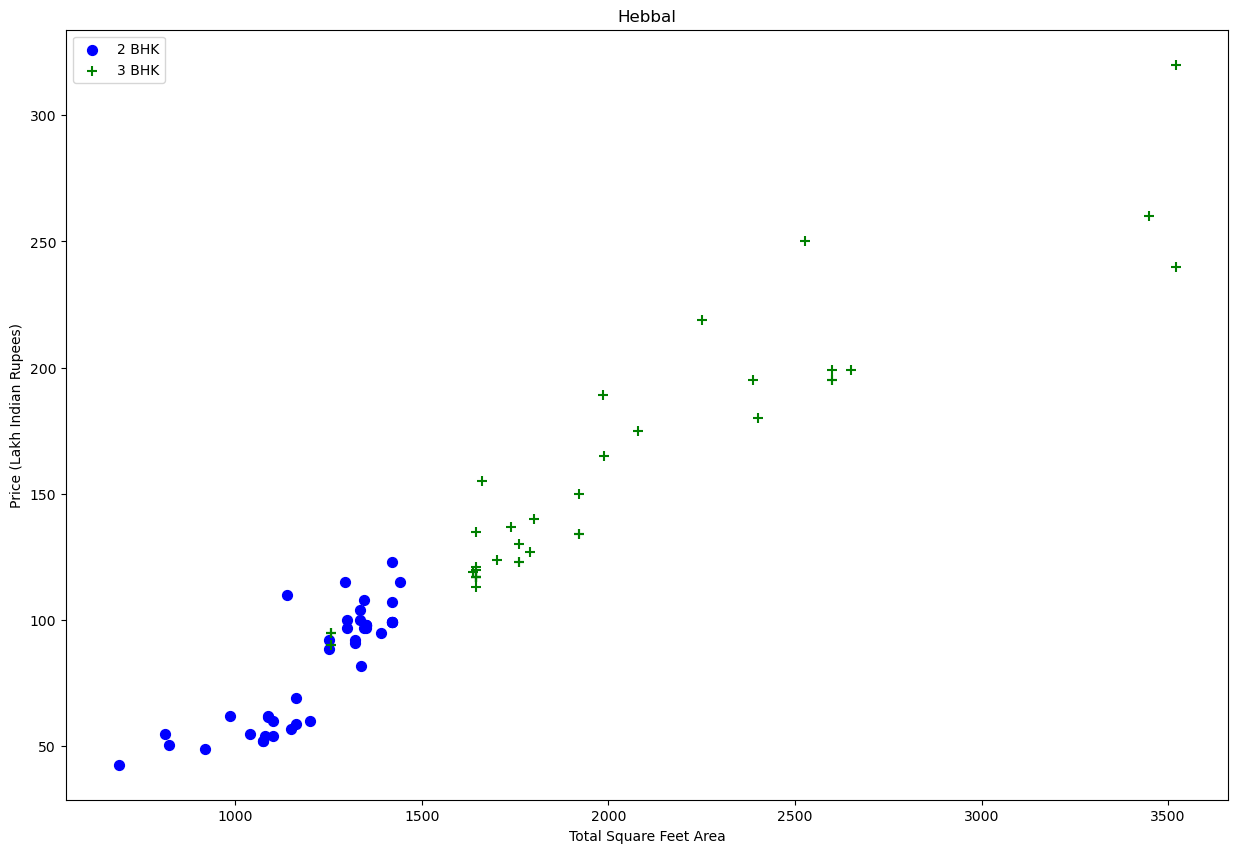

In [102]:
plot_scatter_chart(df8,"Hebbal")

<img src="C:\Users\MEENAKR\Music\Data Science Learning\Projects\Bangalore Price Prediction ML\model\rajaji_nagar_outliers.png"></img>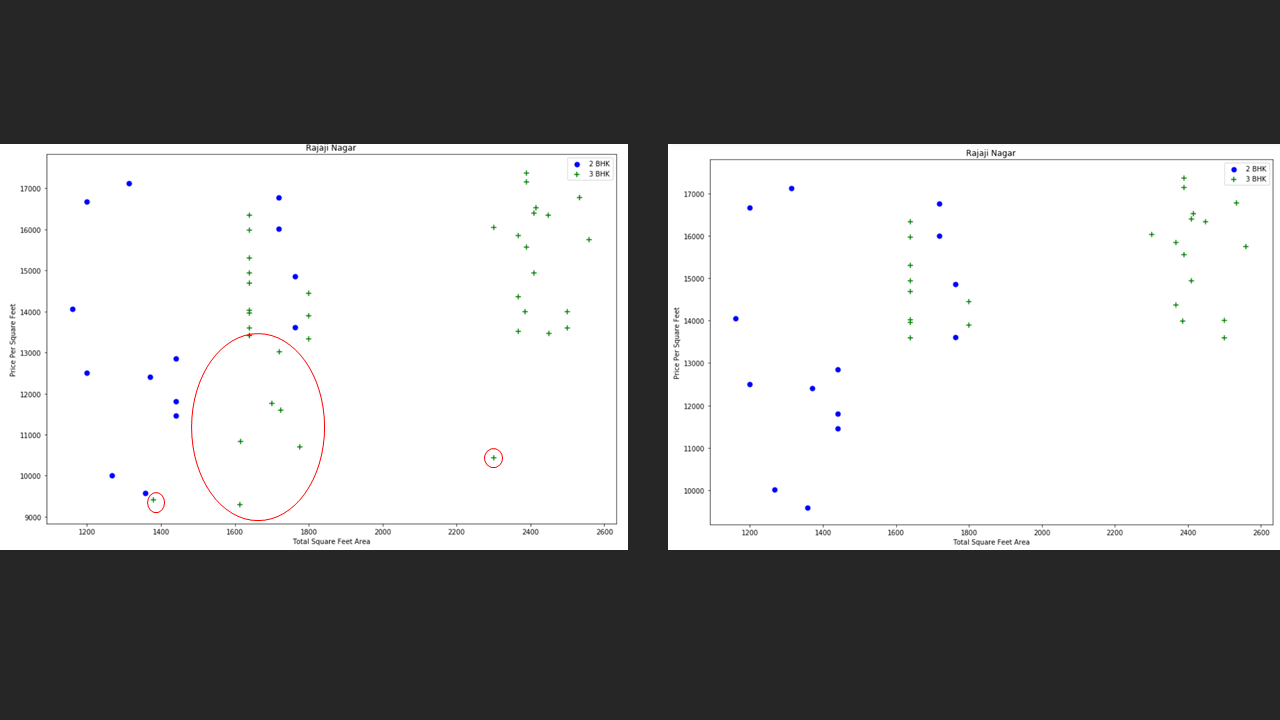

**Plot Histogram to find no of properties/per sqft**

Text(0, 0.5, 'Count')

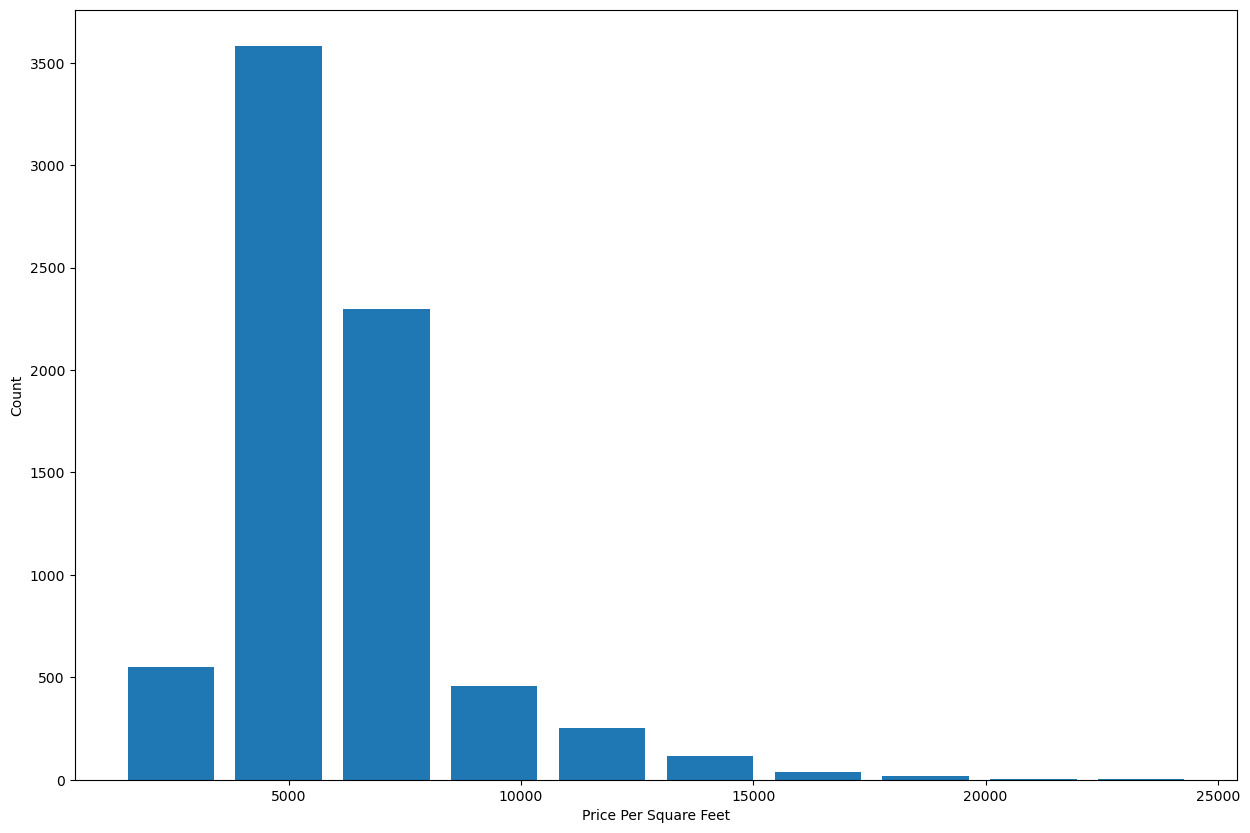

In [103]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [104]:
df8.bath.unique() #find unique values

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [105]:
df8[df8.bath>10]

location    size  total_sqft  bath  price  bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8483           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8572           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9306           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9637           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

Text(0, 0.5, 'Count')

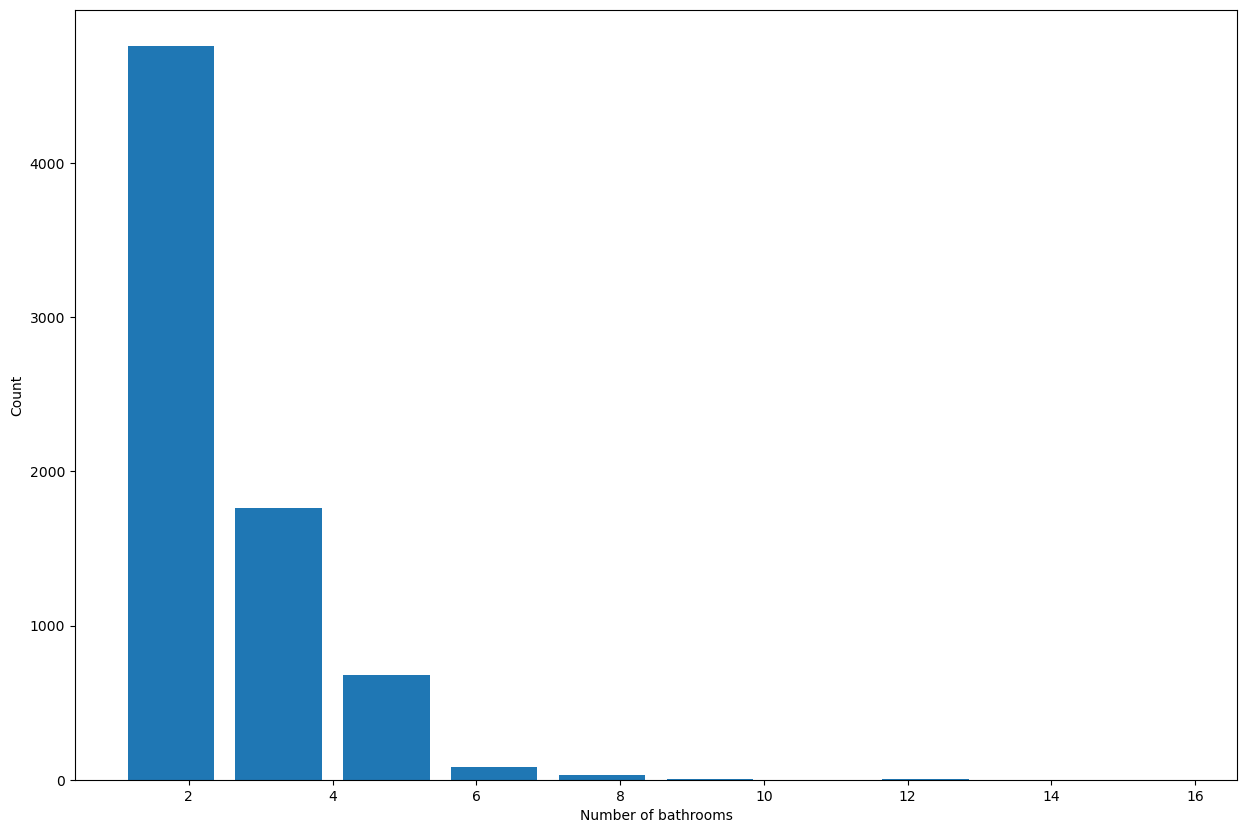

In [106]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [107]:
df8[df8.bath>df8.bhk+2] #Display bath greater than bhk+2

location       size  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8408          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [108]:
df9 = df8[df8.bath<df8.bhk+2] #assigning remaining datapoints according to df9

In [109]:
df9.head(5)

location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668

In [133]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns') #drop some unnecessary features.
df10.head(10)

location  total_sqft  bath  price  bhk
0   1st Block Jayanagar      2850.0   4.0  428.0    4
1   1st Block Jayanagar      1630.0   3.0  194.0    3
2   1st Block Jayanagar      1875.0   2.0  235.0    3
3   1st Block Jayanagar      1200.0   2.0  130.0    3
4   1st Block Jayanagar      1235.0   2.0  148.0    2
5   1st Block Jayanagar      2750.0   4.0  413.0    4
6   1st Block Jayanagar      2450.0   4.0  368.0    4
8    1st Phase JP Nagar      1875.0   3.0  167.0    3
9    1st Phase JP Nagar      1500.0   5.0   85.0    5
10   1st Phase JP Nagar      2065.0   4.0  210.0    3

Use One Hot Encoding For Location

In [111]:
dummies = pd.get_dummies(df10.location) #create a new column of specific block
dummies.head(10)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                     1                   0                          0   
1                     1                   0                          0   
2                     1                   0                          0   
3                     1                   0                          0   
4                     1                   0                          0   
5                     1                   0                          0   
6                     1                   0                          0   
8                     0                   1                          0   
9                     0                   1                          0   
10                    0                   1                          0   

    2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                      0                     0                   0   
1                      0                     0                   0   
2                      0                     0                   0   
3                      0                     0                   0   
4                      0                     0                   0   
5                      0                     0                   0   
6                      0                     0                   0   
8                      0                     0                   0   
9                      0                     0                   0   
10                     0                     0                   0   

    6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   
5                    0                   0                   0   
6                    0                   0                   0   
8                    0                   0                   0   
9                    0                   0                   0   
10                   0                   0                   0   

    9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                    0  ...                     0                   0   
1                    0  ...                     0                   0   
2                    0  ...                     0                   0   
3                    0  ...                     0                   0   
4                    0  ...                     0                   0   
5                    0  ...                     0                   0   
6                    0  ...                     0                   0   
8                    0  ...                     0                   0   
9                    0  ...                     0                   0   
10                   0  ...                     0                   0   

    Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0             0           0               0          0                   0   
1             0           0               0          0                   0   
2             0           0               0          0                   0   
3             0           0               0          0                   0   
4             0           0               0          0                   0   
5             0           0               0          0                   0   
6             0           0               0          0                   0   
8             0           0               0          0                   0   
9             0           0               0          0                   0   
10            0           0               0          0                   0   

    Yelenahalli  Yeshwanthpu

In [112]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                    1   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

In [113]:
df12 = df11.drop('location',axis='columns') #drop location
df12.head(5)

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   
2      1875.0   2.0  235.0    3                    1                   0   
3      1200.0   2.0  130.0    3                    1                   0   
4      1235.0   2.0  148.0    2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   
2                   0  ...            0                     0   
3                   0  ...            0                     0   
4                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 244 columns]

In [114]:
df12.shape

(7239, 244)

Build the Model

In [115]:
X = df12.drop(['price'],axis='columns') #creating independent variable for model training
X.head(3)

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                    1                   0   
1      1630.0   3.0    3                    1                   0   
2      1875.0   2.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  

[3 rows x 243 columns]

In [116]:
X.shape

(7239, 243)

In [117]:
y = df12.price #dependent variable - price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [118]:
len(y)

7239

Train the model - ML

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [120]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train) #fit method
lr_clf.score(X_test,y_test) #accuracy 

0.8629132245229442

<h3 style='color:blue'>Use K Fold cross validation to measure accuracy of LinearRegression model</h3>

In [121]:
from sklearn.model_selection import ShuffleSplit #randomize all samples for equal ditribution
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [122]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
model=make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

model  best_score                                 best_params
0  linear_regression    0.847796                        {'normalize': False}
1              lasso    0.726738         {'alpha': 2, 'selection': 'random'}
2      decision_tree    0.694702  {'criterion': 'mse', 'splitter': 'random'}

In [123]:
X.columns #list the no of columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [124]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0] #to find column index of location

5

<h3 style='color:blue'>Test the model for few properties</h3>

In [125]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [139]:
predict_price('Electronic city Phase ',1000, 2, 2)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [136]:
predict_price('Electronic City Phase II',1000, 2, 3)

30.959279134611677

In [137]:
predict_price('JP Nagar',1000, 2, 2)

53.55260473055738

In [129]:
predict_price('Indira Nagar',1000, 3, 3)

195.52689759854718

<h4 style='color:blue'>Export the tested model to a pickle file</h4>

In [130]:
import pickle #export the artifacts to pickle file 
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

<h4 style='color:blue'>Importing all columns to json file for flask server</h4>

In [131]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))